In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df22=pd.read_csv('diem_thi_thpt_2022.csv')

In [3]:
df22.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [4]:
df23=pd.read_csv('diem_thi_thpt_2023.csv')

In [5]:
df23.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


In [6]:
df24=pd.read_csv('diem_thi_thpt_2024.csv')

In [7]:
df24.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


In [8]:
df22['ma_ngoai_ngu']=float('nan')

In [9]:
df22.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,NaN
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,NaN
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,NaN
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,NaN
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,NaN


In [10]:
df22['year']=2022
df23['year']=2023
df24['year']=2024

In [11]:
data=pd.concat([df22,df23,df24],axis=0,ignore_index=True)

In [16]:
data.sample(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
1159462,2061950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2191849,2066931,7.6,7.75,6.8,NaN,NaN,NaN,7.5,7.5,9.5,N1,2024


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079106 entries, 0 to 3079105
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sbd           int64  
 1   toan          float64
 2   ngu_van       float64
 3   ngoai_ngu     float64
 4   vat_li        float64
 5   hoa_hoc       float64
 6   sinh_hoc      float64
 7   lich_su       float64
 8   dia_li        float64
 9   gdcd          float64
 10  ma_ngoai_ngu  object 
 11  year          int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 281.9+ MB


In [18]:
df=data.copy()

In [23]:
students_per_year=df['year'].value_counts().sort_index()

In [24]:
growth_rate=students_per_year.pct_change() * 100

In [27]:
students_growth_df = pd.DataFrame({
    'so_luong_thi_sinh': students_per_year,
    'ty_le_tang_truong': growth_rate
}).reset_index().rename(columns={'index': 'year'})

In [28]:
students_growth_df

,year,so_luong_thi_sinh,ty_le_tang_truong
0,2022,995441,NaN
1,2023,1022060,2.674091
2,2024,1061605,3.869147


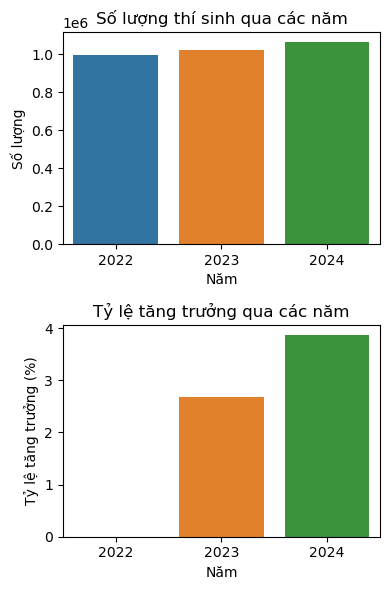

In [34]:
fig, axes =plt.subplots(2,1,figsize=(4,6))

sns.barplot(
    data=students_growth_df,
    x='year',
    y='so_luong_thi_sinh',
    ax=axes[0]
)
axes[0].set_title('Số lượng thí sinh qua các năm')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Số lượng')

sns.barplot(
    data=students_growth_df,
    x='year',
    y='ty_le_tang_truong',
    ax=axes[1]
)
axes[1].set_title('Tỷ lệ tăng trưởng qua các năm')
axes[1].set_ylabel('Tỷ lệ tăng trưởng (%)')
axes[1].set_xlabel('Năm')
plt.tight_layout()
plt.show()

In [35]:
subjects=['toan','ngu_van','ngoai_ngu','vat_li','hoa_hoc','sinh_hoc','lich_su','dia_li','gdcd']

In [40]:
mean_score_by_year= df.groupby('year')[subjects].mean().reset_index()

In [41]:
mean_score_by_year

,year,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,2022,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266
1,2023,6.250557,6.858194,5.462410,6.573900,6.744646,6.394933,6.025629,6.147523,8.285805
2,2024,6.447309,7.231146,5.521938,6.666866,6.680830,6.284079,6.570343,7.193541,8.156503


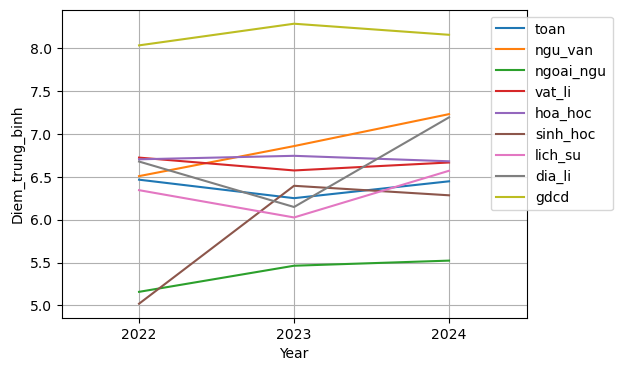

In [66]:
plt.figure(figsize=(6,4))
for i,subject in enumerate(subjects):
    sns.lineplot(
        data=mean_score_by_year,
        x='year',
        y=subject,
        label=f'{subject}'
     )
plt.xlabel('Year')
plt.ylabel('Diem_trung_binh')
plt.xlim(2021.5,2024.5)
plt.xticks(range(2022,2025,1))
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.grid(True)
plt.show()

In [67]:
title=['Toán','Văn','Anh','Lí','Hóa','Sinh','Sử','Địa','CD']
x_year=[2022,2023,2024]

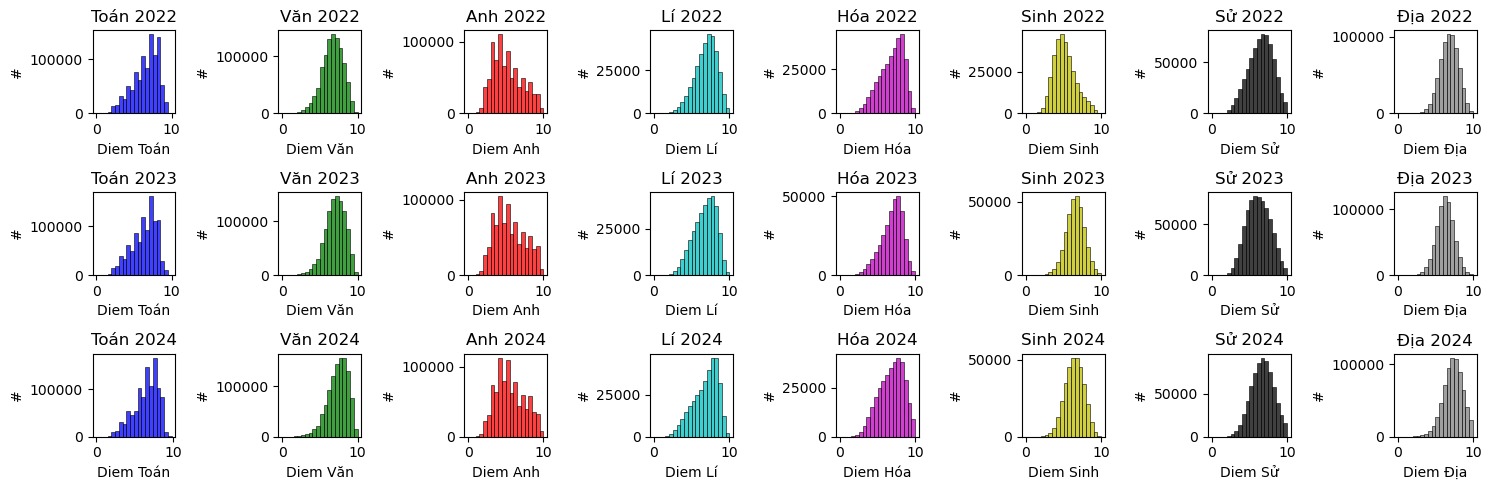

In [68]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#808080']
fig, axes =plt.subplots(3,8, figsize=(15,5))
for i, year in enumerate(x_year):
    for j,(subject,color) in enumerate(zip(subjects,colors)):
        sns.histplot(
            data[data.year==year][subject],
            ax=axes[i,j],
            bins=20,
            color=color
        )
        axes[i,j].set_title(f'{title[j]} {year}')
        axes[i,j].set_xlabel(f'Diem {title[j]}')
        axes[i,j].set_ylabel('#')
plt.tight_layout()
plt.show()

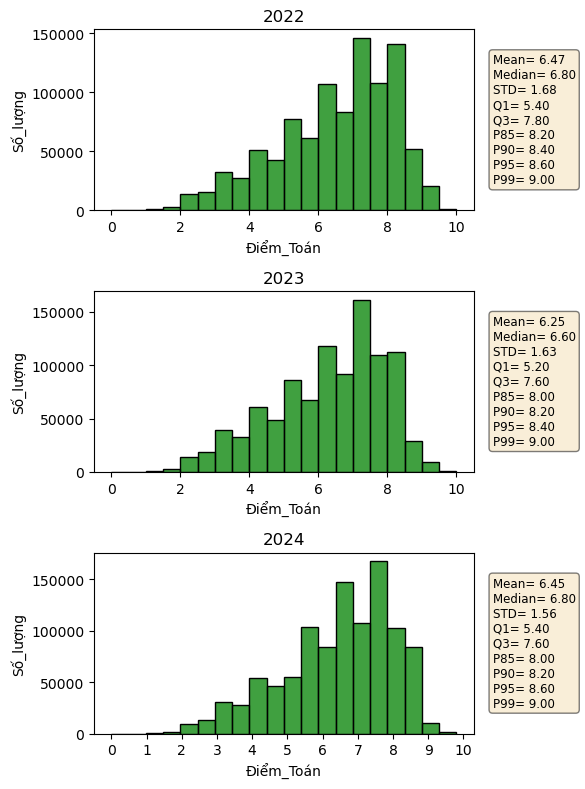

In [69]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['toan'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='g'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Toán')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['toan'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()

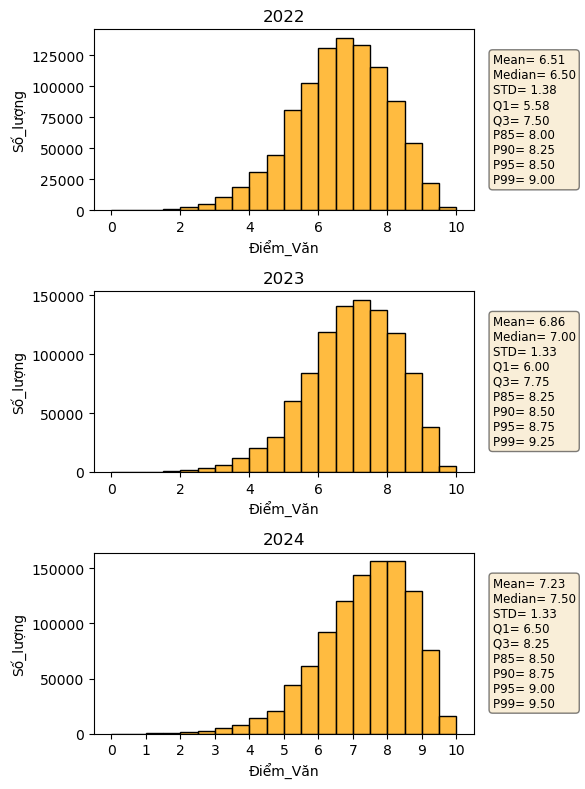

In [70]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['ngu_van'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='orange'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Văn')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['ngu_van'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()